# Plot

- precision and recall curve

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [139]:
!pwd

/Users/camellia/Desktop/exp_results


In [140]:
home_path = '/Users/camellia/Desktop/exp_results' # the same as pwd

# need to save results where the notebook is/ or create another folder to save both
# here I have both saved in 'plot_examples'
rel_path_cyolo = 'pr_plot.npy'
rel_path_base = 'pr_plot_base.npy'

open_path_cyolo = os.path.join(home_path, rel_path_cyolo)
open_path_base = os.path.join(home_path, rel_path_base)

In [141]:
open_path_cyolo

'/Users/camellia/Desktop/exp_results/pr_plot.npy'

In [142]:
open_path_base

'/Users/camellia/Desktop/exp_results/pr_plot_base.npy'

In [146]:
read_dict_cyolo = np.load('pr_plot.npy',allow_pickle='TRUE').item()
read_dict_base = np.load('pr_plot_base.npy',allow_pickle='TRUE').item()

In [147]:
read_dict_cyolo.keys()

dict_keys(['lsX', 'lsY', 'precision', 'recall', 'f1', 'average_precision', 'directory', 'classes'])

In [148]:
read_dict_base.keys()

dict_keys(['lsX', 'lsY', 'precision', 'recall', 'f1', 'average_precision', 'directory', 'classes'])

In [151]:
names = read_dict_cyolo['classes']
names

{0: 'bone-loss', 1: 'dental-caries'}

In [152]:
names = {0: 'BL', 1:'DC'}
names

{0: 'BL', 1: 'DC'}

In [154]:
px_c = read_dict_cyolo['lsX']
py_c = read_dict_cyolo['lsY']
ap_c = read_dict_cyolo['average_precision']

In [155]:
# do not run for real data
# dummy py
dummy_py = [py_c[0]*1000, py_c[1]*100] 

# dummy ap
a0 = ap_c[0]*1000
a1 = ap_c[1]*100
a00 = np.expand_dims(a0,0)
a11 = np.expand_dims(a1,0)
dummy_ap = np.concatenate((a00, a11)) 

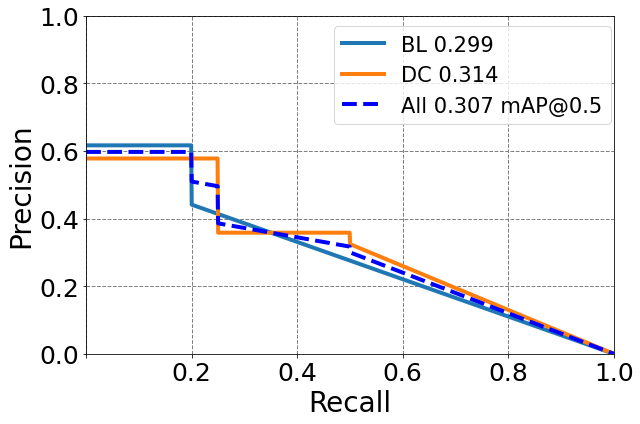

In [156]:
# FOR EACH MODEL, cyolo
fig, ax = plt.subplots(1, 1, figsize=(9, 6), tight_layout=True)

# py = np.stack(py, axis=1)
# for i, y in enumerate(py.T):
#     ax.plot(px, y, linewidth=4, label=f'{names[i]} {ap[i, 0]:.3f}')
# ax.plot(px, py.mean(1), linewidth=4, linestyle='--', color='blue', label='All %.3f mAP@0.5' % ap[:, 0].mean())

d_py = np.stack(dummy_py, axis=1)
for i, y in enumerate(d_py.T):
    ax.plot(px_c, y, linewidth=4, label=f'{names[i]} {dummy_ap[i, 0]:.3f}')
    
ax.plot(px_c, d_py.mean(1), linewidth=4, linestyle='--', color='blue', label='All %.3f mAP@0.5' % dummy_ap[:, 0].mean())

ax.grid(color='grey', linestyle='--', linewidth=1)

ax.set_xlabel('Recall', fontsize=28)
ax.set_ylabel('Precision', fontsize=28)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

x_ticks = ax.xaxis.get_major_ticks()
x_ticks[0].label1.set_visible(False)

plt.legend(bbox_to_anchor=(0.45, 1), loc="upper left", prop={'size': 21})
# plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

In [162]:
px_b = read_dict_base['lsX']
py_b = read_dict_base['lsY']
ap_b = read_dict_base['average_precision']

In [180]:
# do not run for real data
# dummy py
dd_py = [py_b[0]*200, py_b[1]*50] 

# dummy ap
a0 = ap_b[0]*200
a1 = ap_b[1]*50
a00 = np.expand_dims(a0,0)
a11 = np.expand_dims(a1,0)
dd_ap = np.concatenate((a00, a11)) 

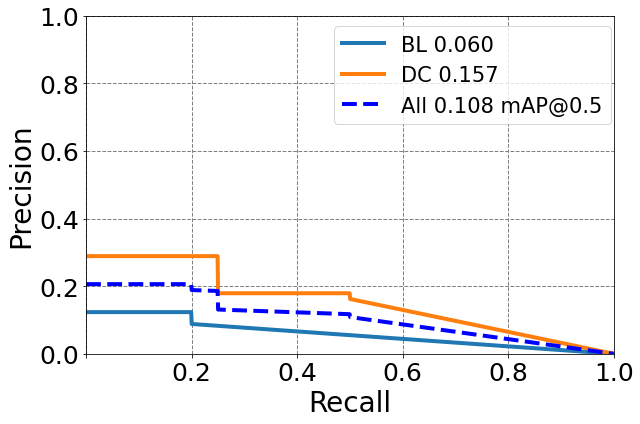

In [181]:
# FOR EACH MODEL, yolo
fig, ax = plt.subplots(1, 1, figsize=(9, 6), tight_layout=True)

# py = np.stack(py, axis=1)
# for i, y in enumerate(py.T):
#     ax.plot(px, y, linewidth=4, label=f'{names[i]} {ap[i, 0]:.3f}')
# ax.plot(px, py.mean(1), linewidth=4, linestyle='--', color='blue', label='All %.3f mAP@0.5' % ap[:, 0].mean())

d_py = np.stack(dd_py, axis=1)
for i, y in enumerate(d_py.T):
    ax.plot(px_c, y, linewidth=4, label=f'{names[i]} {dd_ap[i, 0]:.3f}')
    
ax.plot(px_c, d_py.mean(1), linewidth=4, linestyle='--', color='blue', label='All %.3f mAP@0.5' % dd_ap[:, 0].mean())

ax.grid(color='grey', linestyle='--', linewidth=1)

ax.set_xlabel('Recall', fontsize=28)
ax.set_ylabel('Precision', fontsize=28)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

x_ticks = ax.xaxis.get_major_ticks()
x_ticks[0].label1.set_visible(False)

plt.legend(bbox_to_anchor=(0.45, 1), loc="upper left", prop={'size': 21})
# plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

In [175]:
model_names = {0: 'Crowd-YOLO', 1: 'YOLO'}

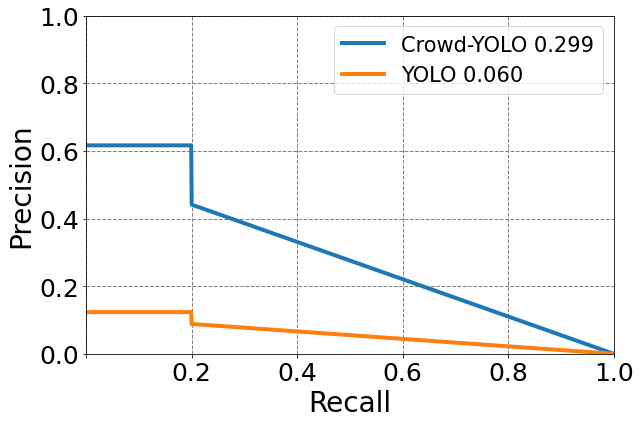

In [184]:
# FOR EACH CLASS, 0 - bone loss
fig, ax = plt.subplots(1, 1, figsize=(9, 6), tight_layout=True)

# py = np.stack(py, axis=1)
# for i, y in enumerate(py.T):
#     ax.plot(px, y, linewidth=4, label=f'{names[i]} {ap[i, 0]:.3f}')
# ax.plot(px, py.mean(1), linewidth=4, linestyle='--', color='blue', label='All %.3f mAP@0.5' % ap[:, 0].mean())

d_py_c = np.stack(dummy_py, axis=1)
d_py_b = np.stack(dd_py, axis=1)

ax.plot(px, d_py_c.T[0], linewidth=4, label=f'{model_names[0]} {dummy_ap[0, 0]:.3f}')
ax.plot(px, d_py_b.T[0], linewidth=4, label=f'{model_names[1]} {dd_ap[0, 0]:.3f}')        

ax.grid(color='grey', linestyle='--', linewidth=1)

ax.set_xlabel('Recall', fontsize=28)
ax.set_ylabel('Precision', fontsize=28)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

x_ticks = ax.xaxis.get_major_ticks()
x_ticks[0].label1.set_visible(False)

plt.legend(bbox_to_anchor=(0.45, 1), loc="upper left", prop={'size': 21})
# plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

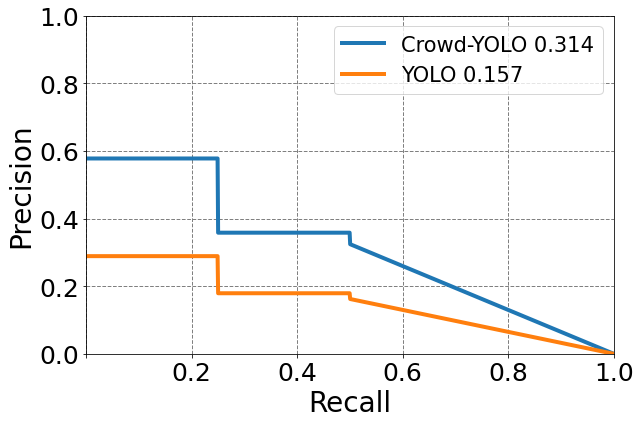

In [185]:
# FOR EACH CLASS, 1 - dental caries
fig, ax = plt.subplots(1, 1, figsize=(9, 6), tight_layout=True)

# py = np.stack(py, axis=1)
# for i, y in enumerate(py.T):
#     ax.plot(px, y, linewidth=4, label=f'{names[i]} {ap[i, 0]:.3f}')
# ax.plot(px, py.mean(1), linewidth=4, linestyle='--', color='blue', label='All %.3f mAP@0.5' % ap[:, 0].mean())

d_py_c = np.stack(dummy_py, axis=1)
d_py_b = np.stack(dd_py, axis=1)

ax.plot(px, d_py_c.T[1], linewidth=4, label=f'{model_names[0]} {dummy_ap[1, 0]:.3f}')
ax.plot(px, d_py_b.T[1], linewidth=4, label=f'{model_names[1]} {dd_ap[1, 0]:.3f}')        

ax.grid(color='grey', linestyle='--', linewidth=1)

ax.set_xlabel('Recall', fontsize=28)
ax.set_ylabel('Precision', fontsize=28)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

x_ticks = ax.xaxis.get_major_ticks()
x_ticks[0].label1.set_visible(False)

plt.legend(bbox_to_anchor=(0.45, 1), loc="upper left", prop={'size': 21})
# plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

- Confusion matrix

ingredients: the real values of each entry

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pwd

/Users/camellia/Desktop/OneDrive - University of Surrey/v3-crowd/src/notebooks_and_tools


In [5]:
home_path = '/Users/camellia/Desktop/OneDrive - University of Surrey/v3-crowd/src/'
cm_path = 'runs/train/exp32/cm_raw.npy'
exp_path = os.path.join(home_path, cm_path)

In [8]:
read_exp_cm = np.load(exp_path, allow_pickle='TRUE').item()

In [9]:
read_exp_cm

{'cm_raw': array([[3.00e+00, 2.00e+00, 2.26e+03],
        [2.00e+00, 2.00e+00, 6.12e+02],
        [0.00e+00, 0.00e+00, 0.00e+00]]),
 'cm_percent': array([[0.59999988, 0.49999988, 0.78690808],
        [0.39999992, 0.49999988, 0.21309192],
        [       nan,        nan,        nan]])}

In [2]:
cf_matrix = np.array([[116,   0, 279], [0,   0,   0], [78,  26,   0]])
cf_matrix = np.array([[83,  6, 11], [12,   71,   17], [32,  8,   60]]) #fake
new_cf = np.array([[0,   0, 0.50], [0.05,   0.08,   0.50], [0.95,  0.92,   0]])
new_cf_baseline = np.array([[0.42,   0, 1], [0,   0,   0], [0.58,  1.00,   0]])

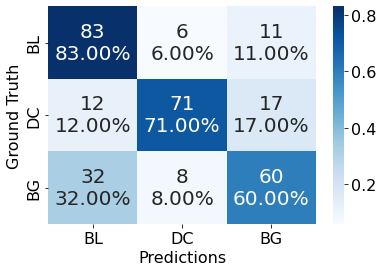

In [3]:
# calculate the sum for each row
gt_sum = np.sum(cf_matrix, axis=1)
# prepare for division later
gt_row_sum = np.stack((gt_sum, gt_sum, gt_sum), axis=1)
# prepare the count, upper entry
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
# prepare the probability, lower entry
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/gt_row_sum.flatten()]
group_percentages = [item.replace('nan%', '0.00%') for item in group_percentages] #get ride of nan (0/0) case

### prepare for drawing probability
group_percentages_draw = [value for value in cf_matrix.flatten()/gt_row_sum.flatten()]
group_percentages_draw = np.asarray(group_percentages_draw).reshape(3,3)
# combine labels and reshape
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)

# ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', annot_kws={"size":20}) ### drawing for counting
ax = sns.heatmap(group_percentages_draw, annot=labels, fmt='', cmap='Blues', annot_kws={"size":20})

# ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('Predictions', fontsize=16)
ax.set_ylabel('Ground Truth', fontsize=16);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['BL','DC', 'BG'], fontsize=16)
ax.yaxis.set_ticklabels(['BL','DC', 'BG'], fontsize=16)

## color bar - larger ticks
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=16)

# cbar = ax.collections[0].colorbar
# cbar.set_ticks([0, .2, .75, 1])

## Display the visualization of the Confusion Matrix.
plt.show()